In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow 

from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, LSTM,  GRU, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Graphs
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
data=pd.read_csv('/kaggle/input/illumina-dataset/base-call-input.csv',delimiter=";")
data

,Cluster,Sequence,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,51
0,cluster_1,A,286.0,373.0,286.0,385.0,350.0,366.0,-1.0,12.0,...,8.0,-58.0,-38.0,41.0,186.0,-13.0,53.0,192.0,42.0,13.0
1,cluster_1,C,223.0,249.0,205.0,305.0,293.0,291.0,0.0,21.0,...,10.0,-12.0,1.0,160.0,111.0,13.0,54.0,160.0,32.0,51.0
2,cluster_1,G,0.0,10.0,-12.0,-66.0,-88.0,-72.0,197.0,-8.0,...,29.0,183.0,26.0,16.0,13.0,22.0,3.0,4.0,11.0,15.0
3,cluster_1,T,0.0,-66.0,18.0,5.0,-2.0,5.0,139.0,84.0,...,147.0,197.0,132.0,44.0,53.0,188.0,154.0,12.0,143.0,121.0
4,cluster_2,A,288.0,387.0,-27.0,326.0,335.0,357.0,33.0,35.0,...,110.0,201.0,57.0,135.0,12.0,31.0,41.0,-30.0,17.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556904,cluster_139227,A,-1.0,-3.0,0.0,11.0,-3.0,40.0,147.0,11.0,...,-13.0,13.0,76.0,27.0,9.0,92.0,61.0,77.0,-4.0,-15.0
556905,cluster_139227,C,-9.0,-8.0,13.0,20.0,-7.0,111.0,112.0,102.0,...,-3.0,12.0,51.0,42.0,20.0,90.0,91.0,74.0,13.0,7.0
556906,cluster_139227,G,114.0,106.0,142.0,-23.0,2.0,2.0,5.0,3.0,...,94.0,100.0,20.0,15.0,12.0,-1.0,0.0,16.0,75.0,82.0
556907,cluster_139227,T,76.0,77.0,65.0,42.0,95.0,19.0,9.0,19.0,...,55.0,0.0,25.0,28.0,58.0,0.0,19.0,17.0,40.0,57.0


In [3]:
data.drop(['Cluster', 'Sequence'], axis=1, inplace=True)
data = data.dropna()
data

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,286.0,373.0,286.0,385.0,350.0,366.0,-1.0,12.0,-56.0,85.0,...,8.0,-58.0,-38.0,41.0,186.0,-13.0,53.0,192.0,42.0,13.0
1,223.0,249.0,205.0,305.0,293.0,291.0,0.0,21.0,25.0,190.0,...,10.0,-12.0,1.0,160.0,111.0,13.0,54.0,160.0,32.0,51.0
2,0.0,10.0,-12.0,-66.0,-88.0,-72.0,197.0,-8.0,195.0,7.0,...,29.0,183.0,26.0,16.0,13.0,22.0,3.0,4.0,11.0,15.0
3,0.0,-66.0,18.0,5.0,-2.0,5.0,139.0,84.0,146.0,15.0,...,147.0,197.0,132.0,44.0,53.0,188.0,154.0,12.0,143.0,121.0
4,288.0,387.0,-27.0,326.0,335.0,357.0,33.0,35.0,20.0,-24.0,...,110.0,201.0,57.0,135.0,12.0,31.0,41.0,-30.0,17.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556903,111.0,141.0,85.0,18.0,31.0,17.0,69.0,29.0,20.0,69.0,...,-7.0,0.0,106.0,64.0,8.0,0.0,-12.0,-17.0,-32.0,-9.0
556904,-1.0,-3.0,0.0,11.0,-3.0,40.0,147.0,11.0,173.0,42.0,...,-13.0,13.0,76.0,27.0,9.0,92.0,61.0,77.0,-4.0,-15.0
556905,-9.0,-8.0,13.0,20.0,-7.0,111.0,112.0,102.0,112.0,126.0,...,-3.0,12.0,51.0,42.0,20.0,90.0,91.0,74.0,13.0,7.0
556906,114.0,106.0,142.0,-23.0,2.0,2.0,5.0,3.0,-3.0,-17.0,...,94.0,100.0,20.0,15.0,12.0,-1.0,0.0,16.0,75.0,82.0


In [4]:
# split data into train:val:test = 8:1:1
train_len = int(np.ceil(len(data) * 0.8))
val_len = int(np.ceil(len(data) * 0.9))

train_len, val_len

(445527, 501218)

In [5]:
# Scale the data
# scaler = MinMaxScaler(feature_range=(0,1))
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.28173375, 0.26045263, 0.21712907, ..., 0.13518321, 0.0712766 ,
        0.05029369],
       [0.24922601, 0.21288838, 0.18455971, ..., 0.12379936, 0.0677305 ,
        0.06424376],
       [0.13415893, 0.12121212, 0.09730599, ..., 0.06830309, 0.06028369,
        0.0510279 ],
       ...,
       [0.12951496, 0.11430763, 0.10735826, ..., 0.09320527, 0.06099291,
        0.04809104],
       [0.19298246, 0.15803606, 0.15922799, ..., 0.07257204, 0.08297872,
        0.07562408],
       [0.17337461, 0.14691216, 0.12826699, ..., 0.07292778, 0.07056738,
        0.0664464 ]])

In [6]:
# create train and test sets
train, val, test = scaled_data[:train_len,:], scaled_data[train_len:val_len,:], scaled_data[val_len:,:]
train.shape, val.shape, test.shape

((445527, 51), (55691, 51), (55690, 51))

In [7]:
# split data into train, val, and test data sets
seq_len = 4
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for i in range(len(train)-seq_len):
    x_train.append(train[i:i+seq_len, :])
    y_train.append(train[i+seq_len, :])

for i in range(len(val)-seq_len):
    x_val.append(val[i:i+seq_len, :])
    y_val.append(val[i+seq_len, :])

for i in range(len(test)-seq_len):
    x_test.append(test[i:i+seq_len, :])
    y_test.append(test[i+seq_len, :])
    
# Convert data sets to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
x_val, y_val = np.array(x_val), np.array(y_val)
x_test, y_test = np.array(x_test), np.array(y_test)

np.shape(x_train), np.shape(x_val), np.shape(x_test)


((445523, 4, 51), (55687, 4, 51), (55686, 4, 51))

In [8]:
# build the LSTM model
model = keras.Sequential()
model.add(Bidirectional(LSTM(units = 50, return_sequences=True), input_shape=(seq_len, data.shape[1])))
model.add(Dropout(0.1))

model.add(Bidirectional(LSTM(units = 50, return_sequences=True)))
model.add(Dropout(0.1))

model.add(Bidirectional(LSTM(units = 50, return_sequences=True)))
model.add(Dropout(0.1))

model.add(Bidirectional(LSTM(units = 50, return_sequences=False)))
model.add(Dropout(0.1))

model.add(Dense(data.shape[1], activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 4, 100)            40800     
_________________________________________________________________
dropout (Dropout)            (None, 4, 100)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 4, 100)            60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 100)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 4, 100)            60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 100)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100)               6

In [9]:
from keras.optimizers import adam_v2

# Set Optimizer
opt = adam_v2.Adam(learning_rate=0.001)

# Compile model
model.compile(
    loss='mean_squared_error',
    optimizer=opt,
    metrics=['accuracy'] 
)

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 300, batch_size = 256)
history


Epoch 1/300
1741/1741 [==============================] - 48s 20ms/step - loss: 0.0019 - accuracy: 0.3337 - val_loss: 0.0016 - val_accuracy: 0.3673
Epoch 2/300
1741/1741 [==============================] - 33s 19ms/step - loss: 0.0017 - accuracy: 0.3713 - val_loss: 0.0016 - val_accuracy: 0.3882
Epoch 3/300
1741/1741 [==============================] - 33s 19ms/step - loss: 0.0017 - accuracy: 0.3826 - val_loss: 0.0015 - val_accuracy: 0.4056
Epoch 4/300
1741/1741 [==============================] - 33s 19ms/step - loss: 0.0016 - accuracy: 0.3913 - val_loss: 0.0015 - val_accuracy: 0.4188
Epoch 5/300
1741/1741 [==============================] - 33s 19ms/step - loss: 0.0016 - accuracy: 0.4073 - val_loss: 0.0014 - val_accuracy: 0.4311
Epoch 6/300
1741/1741 [==============================] - 33s 19ms/step - loss: 0.0015 - accuracy: 0.4253 - val_loss: 0.0013 - val_accuracy: 0.4494
Epoch 7/300
1741/1741 [==============================] - 33s 19ms/step - loss: 0.0014 - accuracy: 0.4348 - val_loss: 0

In [10]:
from keras.models import load_model
    
model.save('bilstm_model_006.h5')
    
model = load_model('bilstm_model_006.h5')

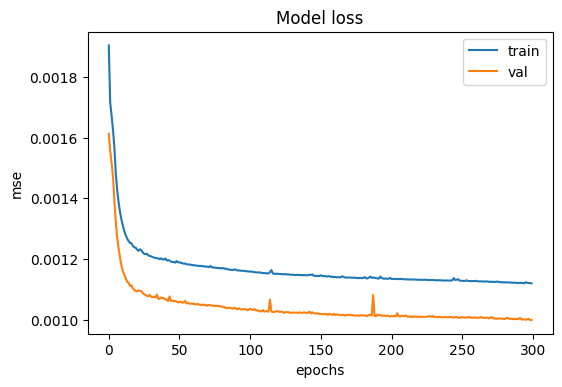

In [11]:
# plot model loss
plt.figure(dpi=100)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.title('Model loss')
plt.show()

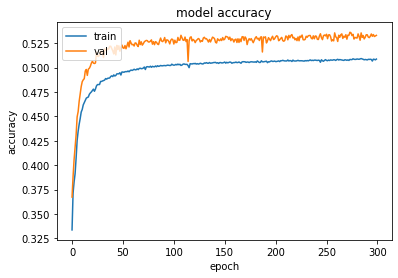

In [12]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
# Plotting Loss vs epochs graph, Accuaracy vs epochs graph
def Plot_Loss_Accuracy( history, epochs ):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    auc = history.history['accuracy']
    val_auc = history.history['val_accuracy']

    epochs = np.linspace(1,epochs,epochs)
    epochs

    fig = go.Figure(data=go.Scatter( x=epochs, y=loss, name='Loss' ))
    fig.add_trace( go.Scatter( x=epochs, y=val_loss, name='Validation Lass' ) )
    fig.layout.update( xaxis_title = 'No. of Epochs',
                       yaxis_title = "Loss",
                       legend=dict( yanchor="bottom", y=0.86, xanchor="right", x=0.99),
                       width=750, height=650,
                       font=dict(size=18))
    fig.show()

    fig = go.Figure(data=go.Scatter( x=epochs, y=auc, name='Accuracy Score' ))
    fig.add_trace( go.Scatter( x=epochs, y=val_auc, name='Validation Accuracy Score' ) )
    fig.layout.update( xaxis_title = 'No. of Epochs',
                       yaxis_title = "Accuracy Scores",
                       legend=dict( yanchor="bottom", y=0.01, xanchor="right", x=0.99),
                       width=750, height=650,
                       font=dict(size=18))
    fig.show()
Plot_Loss_Accuracy( history, epochs=100)

In [14]:
val_predictions = model.predict(x_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val.flatten()})
val_results

,Val Predictions,Actuals
0,0.142893,0.124355
1,0.237679,0.235136
2,0.208706,0.182147
3,0.124094,0.132678
4,0.090546,0.072239
...,...,...
2840032,0.068501,0.079668
2840033,0.077425,0.056443
2840034,0.094441,0.087513
2840035,0.080009,0.061348
